In [1]:
import pandas as pd
import requests
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

import datetime as dt
plt.style.use('fivethirtyeight')


API_key = "ed733879878dc4eefc0f1f08664391a3"


ticker = "NOC"

In [2]:
# pulling the data for the company

url2 = "https://financialmodelingprep.com/api/v3/technical_indicator/daily/"
   
query_url2 = url2 + ticker + "?period=10&type=rsi" + "&apikey=" + API_key

indicator = requests.get(query_url2).json()

print(indicator)

[{'date': '2020-11-13', 'open': 308.079987, 'high': 313.119995, 'low': 307.109985, 'close': 311.709991, 'volume': 493400.0, 'rsi': 54.276352434664005}, {'date': '2020-11-12', 'open': 308.0, 'high': 308.779999, 'low': 302.339996, 'close': 306.230011, 'volume': 737400.0, 'rsi': 49.1882095172689}, {'date': '2020-11-11', 'open': 314.959991, 'high': 314.970001, 'low': 306.019989, 'close': 309.959991, 'volume': 590700.0, 'rsi': 52.786634432390265}, {'date': '2020-11-10', 'open': 302.730011, 'high': 316.899994, 'low': 301.480011, 'close': 314.51001, 'volume': 948500.0, 'rsi': 57.39647457215847}, {'date': '2020-11-09', 'open': 315.0, 'high': 317.600006, 'low': 300.070007, 'close': 301.279999, 'volume': 1732000.0, 'rsi': 44.77586549483684}, {'date': '2020-11-06', 'open': 305.73999, 'high': 305.940002, 'low': 296.630005, 'close': 301.359985, 'volume': 946700.0, 'rsi': 44.848155064823736}, {'date': '2020-11-05', 'open': 316.5, 'high': 317.279999, 'low': 306.059998, 'close': 307.399994, 'volume': 

In [3]:
#creating DataFrame
indicator_df = pd.DataFrame(indicator)
indicator_df = indicator_df.sort_values(by="date")
indicator_df

,date,open,high,low,close,volume,rsi
1258,2015-11-16,165.825600,172.655600,165.325600,172.535600,1780200.0,0.000000
1257,2015-11-17,173.961100,173.961100,171.071100,172.101100,1325500.0,0.000000
1256,2015-11-18,172.260300,174.290300,172.090300,173.950300,845100.0,82.544359
1255,2015-11-19,174.721200,175.241200,172.981200,174.061200,1030200.0,83.454428
1254,2015-11-20,175.069200,175.859200,174.549200,175.189200,1243100.0,89.588838
...,...,...,...,...,...,...,...
4,2020-11-09,315.000000,317.600006,300.070007,301.279999,1732000.0,44.775865
3,2020-11-10,302.730011,316.899994,301.480011,314.510010,948500.0,57.396475
2,2020-11-11,314.959991,314.970001,306.019989,309.959991,590700.0,52.786634
1,2020-11-12,308.000000,308.779999,302.339996,306.230011,737400.0,49.188210


In [4]:
# pulling the market data (SPY)

url3 = "https://financialmodelingprep.com/api/v3/technical_indicator/daily/"
   
query_url3 = url3 + "SPY?period=10&type=rsi" + "&apikey=" + API_key

spy = requests.get(query_url3).json()

print(spy)


[{'date': '2020-11-13', 'open': 355.269989, 'high': 358.899994, 'low': 354.709991, 'close': 358.100006, 'volume': 62892200.0, 'rsi': 67.46742883715231}, {'date': '2020-11-12', 'open': 355.579987, 'high': 356.720001, 'low': 351.26001, 'close': 353.209991, 'volume': 67546200.0, 'rsi': 62.529124440155556}, {'date': '2020-11-11', 'open': 356.399994, 'high': 357.559998, 'low': 355.059998, 'close': 356.670013, 'volume': 58649000.0, 'rsi': 69.22032896995137}, {'date': '2020-11-10', 'open': 353.48999, 'high': 355.179993, 'low': 350.51001, 'close': 354.040009, 'volume': 85552000.0, 'rsi': 66.78911933645477}, {'date': '2020-11-09', 'open': 363.970001, 'high': 364.380005, 'low': 354.059998, 'close': 354.559998, 'volume': 172304200.0, 'rsi': 67.74123964999349}, {'date': '2020-11-06', 'open': 349.929993, 'high': 351.51001, 'low': 347.649994, 'close': 350.160004, 'volume': 74973000.0, 'rsi': 63.81258237762847}, {'date': '2020-11-05', 'open': 349.23999, 'high': 352.190002, 'low': 348.859985, 'close':

In [5]:
#creating DataFrame

spy_df = pd.DataFrame(spy)
spy_df = spy_df.sort_values(by='date')
spy_df

,date,open,high,low,close,volume,rsi
1258,2015-11-16,183.822800,187.192800,183.682800,187.122800,117645200.0,0.000000
1257,2015-11-17,187.506300,188.556300,186.396300,186.986300,121123700.0,0.000000
1256,2015-11-18,187.263000,190.123000,187.213000,189.953000,121342500.0,96.023693
1255,2015-11-19,189.829200,190.289200,189.439200,189.789200,88220500.0,90.681787
1254,2015-11-20,190.620800,191.290800,190.030800,190.480800,94011500.0,92.610373
...,...,...,...,...,...,...,...
4,2020-11-09,363.970001,364.380005,354.059998,354.559998,172304200.0,67.741240
3,2020-11-10,353.489990,355.179993,350.510010,354.040009,85552000.0,66.789119
2,2020-11-11,356.399994,357.559998,355.059998,356.670013,58649000.0,69.220329
1,2020-11-12,355.579987,356.720001,351.260010,353.209991,67546200.0,62.529124


In [6]:
# pulling VIX data

url4 = "https://financialmodelingprep.com/api/v3/technical_indicator/daily/"
   
query_url4 = url4 + "UVXY?period=10&type=rsi" + "&apikey=" + API_key

vix = requests.get(query_url4).json()

print(vix)


[{'date': '2020-11-13', 'open': 13.66, 'high': 13.66, 'low': 12.73, 'close': 13.05, 'volume': 43994400.0, 'rsi': 32.79737897633361}, {'date': '2020-11-12', 'open': 13.3, 'high': 14.82, 'low': 13.09, 'close': 14.37, 'volume': 68251200.0, 'rsi': 37.314849922717535}, {'date': '2020-11-11', 'open': 13.18, 'high': 13.44, 'low': 12.64, 'close': 13.06, 'volume': 34220400.0, 'rsi': 28.52110338630687}, {'date': '2020-11-10', 'open': 13.63, 'high': 14.4, 'low': 13.45, 'close': 13.49, 'volume': 36231600.0, 'rsi': 29.754200343357567}, {'date': '2020-11-09', 'open': 13.14, 'high': 14.18, 'low': 12.18, 'close': 14.18, 'volume': 54605600.0, 'rsi': 31.73573955648732}, {'date': '2020-11-06', 'open': 16.01, 'high': 16.08, 'low': 14.63, 'close': 14.67, 'volume': 53209600.0, 'rsi': 33.1465959863587}, {'date': '2020-11-05', 'open': 15.89, 'high': 16.530001, 'low': 15.65, 'close': 16.209999, 'volume': 33461500.0, 'rsi': 37.91423499083043}, {'date': '2020-11-04', 'open': 18.0, 'high': 18.049999, 'low': 16.5,

In [7]:
#creating DataFrame

vix_df = pd.DataFrame(vix)
vix_df = vix_df.sort_values(by='date')
vix_df

,date,open,high,low,close,volume,rsi
1258,2015-11-16,18625.00,18900.00,14840.00,14960.00,65800.0,0.000000
1257,2015-11-17,14560.00,17125.00,14430.00,16540.00,71500.0,100.000000
1256,2015-11-18,15945.00,16030.00,14400.00,14460.00,51100.0,40.605368
1255,2015-11-19,14740.00,15830.00,14600.00,15450.00,40700.0,54.802260
1254,2015-11-20,14510.00,14715.00,14075.00,14445.00,43700.0,43.164674
...,...,...,...,...,...,...,...
4,2020-11-09,13.14,14.18,12.18,14.18,54605600.0,31.735740
3,2020-11-10,13.63,14.40,13.45,13.49,36231600.0,29.754200
2,2020-11-11,13.18,13.44,12.64,13.06,34220400.0,28.521103
1,2020-11-12,13.30,14.82,13.09,14.37,68251200.0,37.314850


In [8]:
#merging data

merge_df = pd.merge(indicator_df,spy_df, on="date", how="left", suffixes=("","_SPY"))
#merge_df = merge_df[merge_df["date"] > "2018-12-31"]
merge_df

,date,open,high,low,close,volume,rsi,open_SPY,high_SPY,low_SPY,close_SPY,volume_SPY,rsi_SPY
0,2015-11-16,165.825600,172.655600,165.325600,172.535600,1780200.0,0.000000,183.822800,187.192800,183.682800,187.122800,117645200.0,0.000000
1,2015-11-17,173.961100,173.961100,171.071100,172.101100,1325500.0,0.000000,187.506300,188.556300,186.396300,186.986300,121123700.0,0.000000
2,2015-11-18,172.260300,174.290300,172.090300,173.950300,845100.0,82.544359,187.263000,190.123000,187.213000,189.953000,121342500.0,96.023693
3,2015-11-19,174.721200,175.241200,172.981200,174.061200,1030200.0,83.454428,189.829200,190.289200,189.439200,189.789200,88220500.0,90.681787
4,2015-11-20,175.069200,175.859200,174.549200,175.189200,1243100.0,89.588838,190.620800,191.290800,190.030800,190.480800,94011500.0,92.610373
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2020-11-09,315.000000,317.600006,300.070007,301.279999,1732000.0,44.775865,363.970001,364.380005,354.059998,354.559998,172304200.0,67.741240
1255,2020-11-10,302.730011,316.899994,301.480011,314.510010,948500.0,57.396475,353.489990,355.179993,350.510010,354.040009,85552000.0,66.789119
1256,2020-11-11,314.959991,314.970001,306.019989,309.959991,590700.0,52.786634,356.399994,357.559998,355.059998,356.670013,58649000.0,69.220329
1257,2020-11-12,308.000000,308.779999,302.339996,306.230011,737400.0,49.188210,355.579987,356.720001,351.260010,353.209991,67546200.0,62.529124


In [9]:
#merging data

merge_df2 = pd.merge(merge_df, vix_df, on = "date", how="left", suffixes=("", "_VIX"))
merge_df2.tail(60)

,date,open,high,low,close,volume,rsi,open_SPY,high_SPY,low_SPY,close_SPY,volume_SPY,rsi_SPY,open_VIX,high_VIX,low_VIX,close_VIX,volume_VIX,rsi_VIX
1199,2020-08-21,337.299988,339.130005,336.440002,337.859985,440800.0,63.589715,337.920013,339.720001,337.549988,339.480011,55106600.0,71.305039,20.320000,20.450001,19.780001,19.920000,27482600.0,29.758997
1200,2020-08-24,338.700012,344.510010,338.410004,344.420013,416700.0,71.057744,342.119995,343.000000,339.450012,342.920013,48588700.0,76.812765,19.090000,20.129999,19.040001,19.799999,24983000.0,29.190110
1201,2020-08-25,345.000000,345.070007,341.450012,343.000000,454600.0,67.717143,343.529999,344.209991,342.269989,344.119995,38463400.0,78.418321,19.950001,20.790001,19.459999,19.660000,27572400.0,28.484262
1202,2020-08-26,341.500000,342.880005,338.019989,341.410004,607200.0,63.975290,344.760010,347.859985,344.170013,347.570007,50790200.0,82.327443,19.469999,20.480000,18.750000,20.309999,29100800.0,36.415999
1203,2020-08-27,343.459991,349.230011,342.059998,348.989990,669200.0,72.132127,348.510010,349.899994,346.529999,348.329987,58034100.0,83.077671,20.000000,23.690001,19.700001,21.230000,73365600.0,45.859296
1204,2020-08-28,347.779999,348.549988,342.269989,344.750000,513500.0,63.233510,349.440002,350.720001,348.149994,350.579987,48588900.0,85.151254,21.639999,22.980000,20.600000,21.110001,50204700.0,44.893019
1205,2020-08-31,343.200012,344.459991,341.570007,342.609985,558000.0,59.141862,350.350006,351.299988,349.059998,349.309998,66099200.0,79.074487,21.930000,22.950001,21.219999,22.650000,41189100.0,57.624732
1206,2020-09-01,340.160004,342.869995,337.109985,340.380005,538800.0,55.019826,350.209991,352.709991,349.239990,352.600006,54999300.0,82.640434,22.670000,23.440001,22.400000,23.240000,34285700.0,61.419117
1207,2020-09-02,338.820007,350.250000,338.019989,348.359985,660600.0,64.780122,354.670013,358.750000,353.429993,357.700012,69540000.0,86.579538,23.150000,24.389999,23.020000,24.080000,42972600.0,66.206005
1208,2020-09-03,350.649994,352.119995,339.920013,342.230011,791700.0,54.657246,355.869995,356.380005,342.589996,345.390015,148011100.0,53.824254,24.510000,30.280001,23.230000,28.900000,135998900.0,81.131788


In [10]:
#splitting data to X values and dates
dataset_train = merge_df2
cols = list(dataset_train)[1:]

datelist_train = list(dataset_train['date'])
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]

print(f"traindata shape = {dataset_train.shape}")
print(f"time stamps = {len(dataset_train)}")
print(f"features = {cols}")


traindata shape = (1259, 19)
time stamps = 1259
features = ['open', 'high', 'low', 'close', 'volume', 'rsi', 'open_SPY', 'high_SPY', 'low_SPY', 'close_SPY', 'volume_SPY', 'rsi_SPY', 'open_VIX', 'high_VIX', 'low_VIX', 'close_VIX', 'volume_VIX', 'rsi_VIX']


In [11]:
#changing X values to numpy

dataset_train = dataset_train[cols]
dataset_train = dataset_train.astype(float)
training_set = dataset_train.to_numpy()
training_set

array([[1.65825600e+02, 1.72655600e+02, 1.65325600e+02, ...,
        1.49600000e+04, 6.58000000e+04, 0.00000000e+00],
       [1.73961100e+02, 1.73961100e+02, 1.71071100e+02, ...,
        1.65400000e+04, 7.15000000e+04, 1.00000000e+02],
       [1.72260300e+02, 1.74290300e+02, 1.72090300e+02, ...,
        1.44600000e+04, 5.11000000e+04, 4.06053684e+01],
       ...,
       [3.14959991e+02, 3.14970001e+02, 3.06019989e+02, ...,
        1.30600000e+01, 3.42204000e+07, 2.85211034e+01],
       [3.08000000e+02, 3.08779999e+02, 3.02339996e+02, ...,
        1.43700000e+01, 6.82512000e+07, 3.73148499e+01],
       [3.08079987e+02, 3.13119995e+02, 3.07109985e+02, ...,
        1.30500000e+01, 4.39944000e+07, 3.27973790e+01]])

In [12]:
# Scaling data
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

sc_predict = StandardScaler()
sc_predict.fit_transform(training_set[:, 0:1])

array([[-1.92870639],
       [-1.78444906],
       [-1.81460736],
       ...,
       [ 0.71571979],
       [ 0.59230639],
       [ 0.59372471]])

In [13]:
# Creating a data structure with timestamps and 1 output
X_train = []
y_train = []

n_future = 30   # Number of days we want top predict into the future
n_past = 90     # Number of past days we want to use to predict the future

for i in range(n_past, len(training_set_scaled) - n_future +1):
    X_train.append(training_set_scaled[i - n_past:i, 0:dataset_train.shape[1] - 1])
    y_train.append(training_set_scaled[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (1140, 90, 17).
y_train shape == (1140, 1).


In [14]:
# Initializing the Neural Network based on LSTM
model = Sequential()
# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_past, dataset_train.shape[1]-1)))
# Adding 2nd LSTM layer
model.add(LSTM(units=10, return_sequences=False))
# Adding Dropout
model.add(Dropout(0.25))
# Output layer
model.add(Dense(units=1, activation='linear'))
# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 64)            20992     
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                3000      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 24,003
Trainable params: 24,003
Non-trainable params: 0
_________________________________________________________________


In [16]:
#training data
history = model.fit(X_train, y_train, shuffle=True, epochs=50, validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/50
4/4 [==============================] - 2s 493ms/step - loss: 0.3701 - val_loss: 0.3541
Epoch 2/50
4/4 [==============================] - 0s 121ms/step - loss: 0.1369 - val_loss: 0.2986
Epoch 3/50
4/4 [==============================] - 1s 140ms/step - loss: 0.1310 - val_loss: 0.3936
Epoch 4/50
4/4 [==============================] - 1s 193ms/step - loss: 0.1107 - val_loss: 0.3323
Epoch 5/50
4/4 [==============================] - 1s 196ms/step - loss: 0.0965 - val_loss: 0.3110
Epoch 6/50
4/4 [==============================] - 0s 94ms/step - loss: 0.0750 - val_loss: 0.3131
Epoch 7/50
4/4 [==============================] - 1s 191ms/step - loss: 0.0632 - val_loss: 0.3427
Epoch 8/50
4/4 [==============================] - 1s 205ms/step - loss: 0.0557 - val_loss: 0.2630
Epoch 9/50
4/4 [==============================] - 1s 172ms/step - loss: 0.0562 - val_loss: 0.3773
Epoch 10/50
4/4 [==============================] - 1s 200ms/step - loss: 0.0563 - val_loss: 0.2940
Epoch 11/50
4/4 [===

In [17]:
# Generate list of sequence of days for predictions
datelist_future = pd.date_range(datelist_train[-1], periods=n_future, freq='1d').tolist()

# creating date information into timestamp format
datelist_future_ = []
for this_timestamp in datelist_future:
    datelist_future_.append(this_timestamp.date())

In [18]:
predictions_future = model.predict(X_train[-n_future:])

predictions_train = model.predict(X_train[n_past:])

In [19]:
# Inverse the predictions to original measurements

def datetime_to_timestamp(x):
    return dt.datetime.strptime(x.strftime('%Y%m%d'), '%Y%m%d')


y_pred_future = sc_predict.inverse_transform(predictions_future)
y_pred_train = sc_predict.inverse_transform(predictions_train)

PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
PREDICTION_TRAIN = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))

# Convert <datetime.date> to <Timestamp> for PREDCITION_TRAIN
PREDICTION_TRAIN.index = PREDICTION_TRAIN.index.to_series().apply(datetime_to_timestamp)

PREDICTION_TRAIN.head(3)

,Open
2016-09-15,206.018082
2016-09-16,206.668243
2016-09-19,206.993774


In [20]:
y_pred_future = sc_predict.inverse_transform(PREDICTIONS_FUTURE)

predictions_future = pd.DataFrame(y_pred_future, columns=['Open']).set_index(pd.Series(datelist_future))
predictions_future

,Open
2020-11-13,20538.021484
2020-11-14,20535.126953
2020-11-15,20530.708984
2020-11-16,20522.789062
2020-11-17,20589.445312
2020-11-18,20539.412109
2020-11-19,20534.271484
2020-11-20,20517.902344
2020-11-21,20531.953125
2020-11-22,20681.544922


In [21]:
y_pred_train = sc_predict.inverse_transform(PREDICTION_TRAIN)

predictions_train = pd.DataFrame(y_pred_train, columns=['Open']).set_index(pd.Series(datelist_train[2 * n_past + n_future -1:]))
predictions_train

,Open
2016-09-15,11893.140625
2016-09-16,11929.806641
2016-09-19,11948.165039
2016-09-20,11917.337891
2016-09-21,11931.878906
...,...
2020-11-09,20706.154297
2020-11-10,20695.623047
2020-11-11,20663.710938
2020-11-12,20603.748047


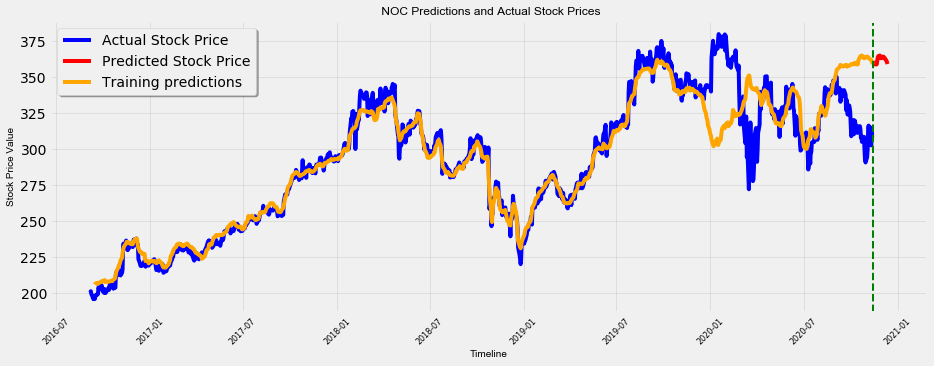

In [22]:
# Set plot size 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

# Plot parameters
START_DATE_FOR_PLOTTING = '2017-01-01' #there is a little bit of discrepancy because stock market is not open on weekends
length =  len(pd.DataFrame(datelist_train).loc[START_DATE_FOR_PLOTTING:])

plt.plot(datelist_train[-length:], dataset_train.iloc[-length:]['open'], color='b', label='Actual Stock Price')
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Open'], color='r', label='Predicted Stock Price')
plt.plot(PREDICTION_TRAIN.iloc[-length:].index, PREDICTION_TRAIN.iloc[-length:]['Open'], color='orange', label='Training predictions')

plt.axvline(x = min(PREDICTIONS_FUTURE.index), color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.title(' NOC Predictions and Actual Stock Prices', family='Arial', fontsize=12)
plt.xlabel('Timeline', family='Arial', fontsize=10)
plt.ylabel('Stock Price Value', family='Arial', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [23]:
rmse = np.sqrt (np.mean (PREDICTION_TRAIN -PREDICTIONS_FUTURE)**2)
rmse

Open    0.001129
dtype: float32